# Обучение нейронной сети:

## Установка tensorflow:

In [99]:
!pip install tensorflow

## Импорт библиотек:

In [100]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

## Загрузка датасета:

In [101]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

## Создание модели нейронной сети:

In [102]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(), 


    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

## Компиляция модели:

In [103]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Обучение модели:

In [110]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9953 - loss: 0.0152 - val_accuracy: 0.9892 - val_loss: 0.0419
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9949 - loss: 0.0165 - val_accuracy: 0.9891 - val_loss: 0.0423
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9960 - loss: 0.0125 - val_accuracy: 0.9874 - val_loss: 0.0543
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9960 - loss: 0.0111 - val_accuracy: 0.9894 - val_loss: 0.0466
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9975 - loss: 0.0087 - val_accuracy: 0.9936 - val_loss: 0.0279
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9983 - loss: 0.0055 - val_accuracy: 0.9892 - val_loss: 0.0539
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9971 - loss: 0.0099 - val_accuracy: 0.9913 - val_loss: 0.0420
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9980 - loss: 0.0070 - 

## Визуализация результатов: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


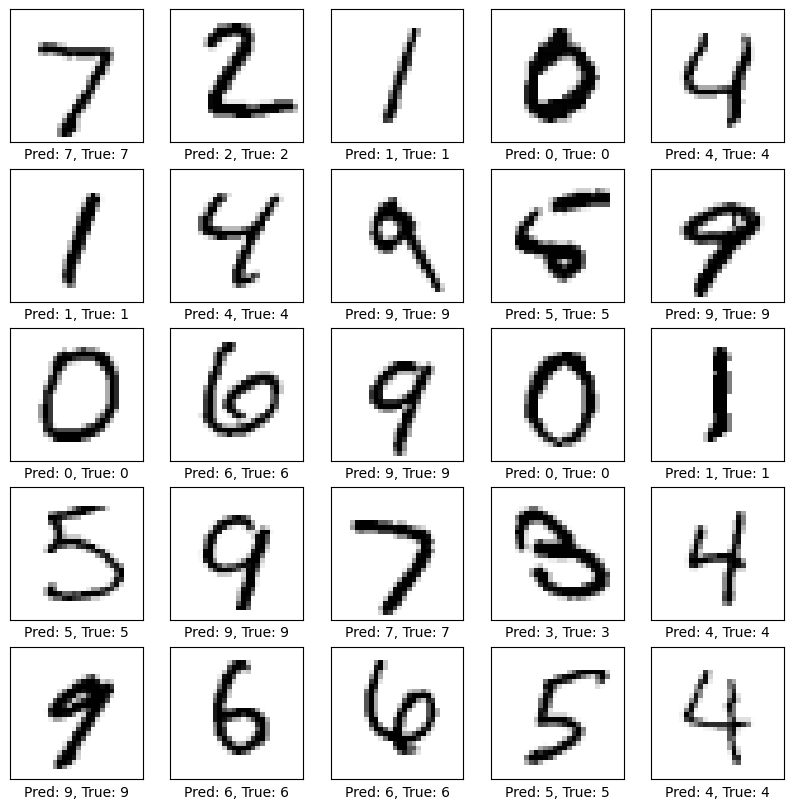

In [112]:
predictions = model.predict(test_images)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {tf.argmax(predictions[i])}, True: {test_labels[i]}")
plt.show()

## Оценка модели:

In [113]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9880 - loss: 0.0809
Test accuracy: 0.9905999898910522


## Сохранение модели:

In [114]:
model.save_weights('mnist_model.weights.h5')

# Тестирование нейронной сети на собственных данных:

## Импорт нужных библиотек:

In [115]:
import numpy as np
from tensorflow.keras.preprocessing import image

## Тестирование нейронной сети на собственных данных:

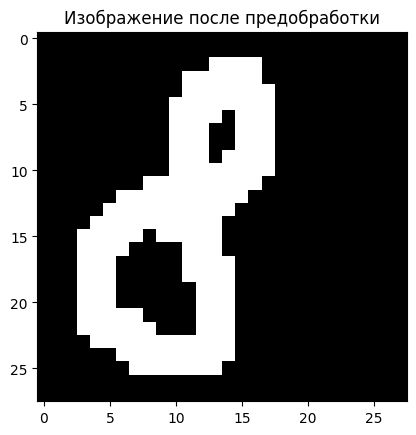

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Предсказанная цифра: 8


In [116]:
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
model.load_weights('mnist_model.weights.h5')

img_path = "/kaggle/input/testimage/test_image.png"
img = image.load_img(img_path, color_mode='grayscale', target_size=(28, 28))

img_array = image.img_to_array(img) 
img_array = np.expand_dims(img_array, axis=0)  
img_array = 1 - img_array / 255.0  

plt.imshow(img_array[0, :, :, 0], cmap='gray')
plt.title("Изображение после предобработки")
plt.show()

predictions = model.predict(img_array)
predicted_digit = np.argmax(predictions)

print(f"Предсказанная цифра: {predicted_digit}")